<div class="alert alert-block alert-info">
    <h1>Wahrscheinlichkeitstheorie und Statistik</h1>
    <h2>WS 2020 / 2021</h2>
    <h2>Intervallschätzer</h2>
    <h3>Allgemeine Informationen:</h3>
    <p>Schreiben Sie Ihre Antwort an die Stelle <i>YOUR ANSWER HERE</i>.</p>
    <p>Wenn Sie eine Zelle bearbeiten, löschen Sie die Zeile <i>raise NotImplementedError()</i>.</p>
    <p>Fügen Sie keine neuen Zellen hinzu oder löschen Zellen.</p>
    <h3>Abgabetermin</h3>
    <p>Die Abgabe der Hausaufgabe ist immer Dienstags um <strong>12:00 Uhr mittags</strong>! Vergessen Sie nicht Ihre Übung abzugeben.</p>
    <h2>Viel Erfolg!</h2>   
</div>

<div class="alert alert-block alert-warning">
    <h2>Hinweise zur Bearbeitung der Übung</h2>
    <h3>Angabe von Ergebnissen</h3>
    <ul>
        <li>Sie müssen nicht runden. Wir testen ob Ihr Ergebnis um maximal $5\%$ vom exaktem Wert abweicht. $f_{rel }= \frac{|x_{exakt} - x_{Studi}|}{x_{exakt}} \leq 0.05$</li>
        <li>Prozentzahlen werden immer als Zahl zwischen 0 und 1 angegeben. 30% wird somit als 0.3 angegeben.</li>
        <li>Fließkommazahlen werden mit einem Dezimalpunkt angegeben, nicht mit einem Komma. $\frac{1}{4} \rightarrow 0.25$.</li>
    </ul>
    <h3>Programmcode</h3>
    <ul>
        <li>Benutzen Sie nur die in der nächsten Zelle angegebenen Bibliotheken mit den dort benutzten Namen. Wenn Sie also etwas aus der Bibliothek <i>random</i> nutzen wollen, verwenden Sie den Namen <i>rd</i>.</li>
        <li>Das Ergebnis einer Funktion muss mittels <i>return</i> zurückgegeben werden. Ein <i>print</i> Statement ist keine gültige Rückgabe.</li>
        <li>Stellen Sie sicher, dass sich Ihr Code ausführen lässt. Code der nicht läuft kann nicht automatisch bewertet werden.</li>
        <li><strong>Bevor Sie abgeben:</strong> Klicken Sie im Menü auf Kernel > Restart & Run All. Damit führen Sie das Notebook von oben nach unten aus. Alle Fehler die dann auftreten, treten auch beim Bewerten auf.</li>
        <li>Entfernen Sie die Zeilen <i>raise NotImplementedError()</i> wenn Sie eine Aufgabe bearbeiten. Ansonsten wird beim Bewerten eine Exception ausgelöst die uns sagt, dass Sie die Aufgabe nicht bearbeitet haben!</li>
    </ul>
    <h3>Plots</h3>
    <ul>
        <li>Jeder Plot soll eine Achsenbeschriftung, einen Titel, eine Legende und ein Grid haben.</li>
    </ul>
    
</div>

In [2]:
import math
import collections
import itertools        
import glob
import numpy as np
import random as rd
import pandas as pd        
import matplotlib.pyplot as plt
from scipy import stats

## Stichprobenfehler für den Mittelwert [70 Punkte]

Diese Übungsaufgabe behandelt das Phänomen des Enthaltenseins mittels Intervallschätzung.

Wir wollen den Mittelwert einer Verteilung schätzen und damit die Bedeutung eines Konfidenzintervalls illustrieren. 

Gegeben sei der aus den vorigen Übungen bekannte Datensatz ```health_cleaned.csv``` mit der Spalte ```Groesse```. 

Wenn wir eine Stichprobe einer bestimmten Größe ziehen und den Mittelwert berechnen, können wir mit einem Konfidenzintervall angeben, in wievielen Fällen das Konfidenzintervall den wahren Mittelwert durchschnittlich  enthält.


### Stichprobenfehler a) [10 Punkte]

Schreiben Sie eine Funktion die aus einer Liste von Daten eine Stichprobe (mit Zurücklegen) zieht, den Mittelwert bildet und dieses Experiment $n$ mal wiederholt. Die Rückgabe der Funktion sind dann $n$ Mittelwerte als Liste.

In [3]:
def stichprobe(daten: [float], stichprobengroesse: int, wiederholungen: int) -> [float]:
    """
    Ziehe eine Stichprobe und bilde den Mittelwert,
    wiederhole n mal
    
    Arguments:
        daten              -- Liste mit Fließkommazahlen
        stichprobengroesse -- Anzahl der Werte aus denen der Mittelwert gebildet wird
        wiederholungen     -- Wie oft soll das Experiment wiederholt werden
    Returns:
        mittelwerte        -- Eine Liste der Stichprobenmittelwerte
    """
    # YOUR CODE HERE
    n=0
    nl=[]
    for i in range(wiederholungen):
        for i in range(stichprobengroesse):
            n+=daten[rd.randint(0,len(daten)-1)]
        nl.append( n/stichprobengroesse)
        n=0
    return nl
#print(stichprobe(range(1,7),200,20))
    # raise NotImplementedError()

### Stichprobenfehler b)  [10 Punkte]

Schreiben Sie eine Funktion die die Länge des Konfidenzintervalls (zweiseitiger Test) berechnet.

In [4]:
def konfidenzintervall(stichprobengroesse: int, varianz: float, konfidenz: float) -> float:
    """
    Berechne das Konfidenzintervall
    
    Arguments:
        stichprobengroesse -- Anzahl der Werte in der Stichprobe
        varianz            -- Varianz der Grundgesamtheit
        konfidenz          -- Konfidenzniveau
    Returns:
        laenge             -- Laenge des Konfidenzintervalls
                              (obere Grenze - untere Grenze)
    """
    # YOUR CODE HERE
    # raise NotImplementedError()
    """mu = sum(range(stichprobengroesse))/stichprobengroesse
    math.sqrt((1/(stichprobengroesse-1)*sum(range(stichprobengroesse))))"""
    return (stats.norm.ppf(konfidenz)*math.sqrt(varianz)/math.sqrt(stichprobengroesse))*2
    
konfidenzintervall(25, 4, 0.95) # Erwartet: ungefähr 1.31

1.3158829015611777

### Stichprobenfehler c)  [25 Punkte]

Laden Sie den Datensatz ```health_cleaned.csv``` in einen Pandas Dataframe. 

Wir wollen nun Stichproben mit verschiedenen Größen für das Merkmal ```Groesse``` ziehen. \
Die vorgegeben Stichprobengrößen sind ```[9, 16, 25, 36, 49, 64, 81, 100, 121, 144]```. \
Für jede Stichprobengröße ziehen wir ```100``` Stichproben und erhalten so ```100``` Mittelwerte.

Zusätzlich benötigen wir das 95% Konfidenzintervall für jede Stichprobengröße (vgl die Vorlesung ```Intervall Schätzer, Folie So berechnen: Konfidenzintervall für den Mittelwert bei bekanntem ```$\sigma$ .). Die wiederholte Bestimmung des Mittelwerts aus der Stichprobe produziert eine Verteilung von Mittelwerten. 

Berechnen Sie für jede Stichprobengröße das Intervall um den echten Mittelwert (normalerweise nicht bekannt) mit der Länge des 95% Konfidenzintervalls (<span style="color:red"><i><b>Achtung:</b></i></span> normalerweise liegt dieses Konfidenzintervall um den Schätzwert und nicht um den nicht bekannten Mittelwert der Grundgesamtheit).

Plotten Sie für jede Stichprobengröße folgende Daten:

- Einen Boxplot für die Stichproben der gegebenen Größe mit Mittelwert und Median
- Das Konfidenzintervall für die Stichprobe um den **echten** Mittelwert

*Hinweis:* Das folgende Bild zeigt einen Ausschnitt des Plots den Sie erstellen sollen (Konfidenzintervall für die Stichprobengröße 9 in blau).

<img src='img/error_plot.png' width='15%'>

Für die Labels der Boxplots können Sie den Parameter *labels* der Funktion ```plt.boxplot``` nutzen.\
Für das Konfidenzintervall können Sie die Funktion ```plt.errorbar``` nutzen.

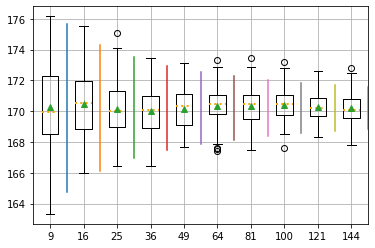

In [13]:
daten = pd.read_csv('data/health_cleaned.csv')

slist = [9, 16, 25, 36, 49, 64, 81, 100, 121, 144]
mwlist = []
konflist=[]
xkonflist=[]
mw = 0
l = len(daten["Groesse"])
std = daten["Groesse"].std()
mean = daten["Groesse"].mean()
for i in slist:
    mw = np.array(stichprobe(daten["Groesse"],i,100))
    mwlist.append(mw)
    #print(mw+stats.norm.ppf(0.95)*std/math.sqrt(i))
    tx = tuple((mw.mean()+stats.norm.ppf(0.95)*std/math.sqrt(i),mw.mean()-stats.norm.ppf(0.95)*std/math.sqrt(i)))
    xkonflist.append(tx)
    
#plt.boxplot(xkonflist,labels=slist,autorange=True,whis=[0,100])
plt.boxplot(mwlist,conf_intervals = xkonflist,labels=slist,showmeans=True,
           medianprops={'color': 'orange', 'linewidth': 2, 'linestyle': ':'},
           meanprops={'marker': '^'})
xkonflist = np.array(xkonflist)
for i,j in zip(slist,range(len(slist))):
    #plt.errorbar(1.6+j,(mean+stats.norm.ppf(0.95)*std/math.sqrt(i),mean-stats.norm.ppf(0.95)*std/math.sqrt(i)))
    plt.errorbar(1.5+j,(mean+(konfidenzintervall(i,std**2,0.95))/2,mean-(konfidenzintervall(i,std**2,0.95))/2,))
#print((mean+stats.norm.ppf(0.95)*std/math.sqrt(l),mean-stats.norm.ppf(0.95)*std/math.sqrt(l)))
#print(np.mean(mwlist),np.median(mwlist))
plt.grid()
plt.show()
# YOUR CODE HERE
#raise NotImplementedError()

### Stichprobenfehler d)  [5 Punkte]

Interpretieren Sie den Plot. Was ist Unterschied zwischen dem grünem Dreieck und roter Linie in den Boxplots?

Die rote Linie ist der median und das grüne Dreieck ist der Mittelwert von den Groessen.

### Stichprobenfehler e)  [10 Punkte]

Wie repräsentiert sich der Zufall im Diagramm?

Was ist die Ursache für den Zufall?

Es werden immer nur zufällige Stichproben genommen, randint.

### Stichprobenfehler f)  [10 Punkte]

Zählen Sie pro Stichprobenexperiment wie häufig der Stichprobenmittelwert ausserhalb des erwarteten theoretisch vorhergesagten Intervalls um den Mittelwert der Grundgesamtheit liegt (bestätigen Sie die 95% Konfidenzregel).

Speichern Sie diese Anzahl (als *value*) für jede Stichprobengröße (als *key*) im Dictionary ```anzahl_ausserhalb```


In [17]:
anzahl_ausserhalb = dict()
xmean = np.mean(daten["Groesse"])
xvar = np.var(daten["Groesse"])
for i,j in zip(slist,range(len(slist))):
    k=0
    x = stichprobe(daten["Groesse"],i,100)
    fehler = konfidenzintervall(i,xvar,0.975)
    #print(fehler)
    for j in x:
        if j>xmean+fehler/2 or j<xmean-fehler/2:
            k+=1
    anzahl_ausserhalb.update({(i):k})
# YOUR CODE HERE
# raise NotImplementedError()

print(anzahl_ausserhalb)

{9: 11, 16: 6, 25: 9, 36: 6, 49: 2, 64: 3, 81: 7, 100: 1, 121: 5, 144: 6}
